# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
# define a seed
np.random.seed(42)

# NOTE: scr.norm.rvs(loc, scale, size) ~> loc=average, scale=standard-deviation and size=size-of-sample
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})


## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# j/a dataframe preview
dataframe.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [5]:
# show the #columns and #rows. 
# NOTE: we expect 2 columns and 1,000 rows based on the rvs() method
dataframe.shape

(10000, 2)

In [6]:
# get more info about the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
normal      10000 non-null float64
binomial    10000 non-null int64
dtypes: float64(1), int64(1)
memory usage: 156.3 KB


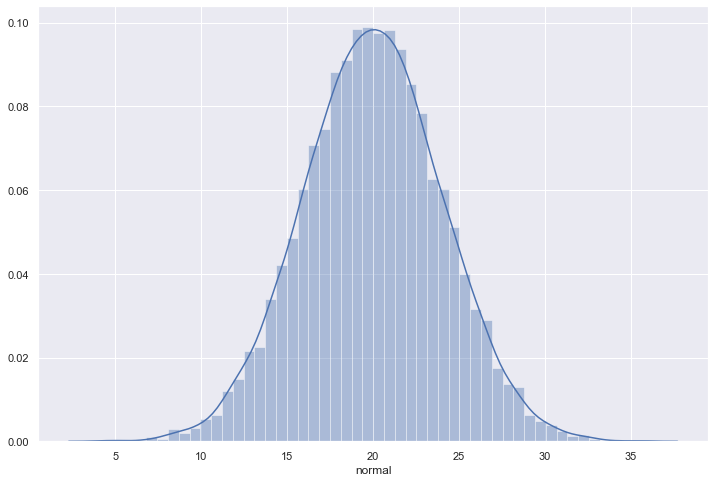

In [7]:
# j/a plot 
sns.distplot(dataframe['normal'])

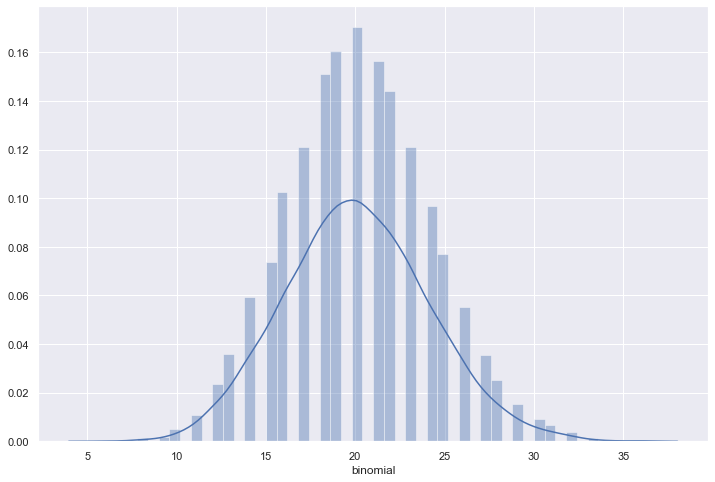

In [8]:
# and so
sns.distplot(dataframe['binomial'])

In [9]:
# get descriptive statistics
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


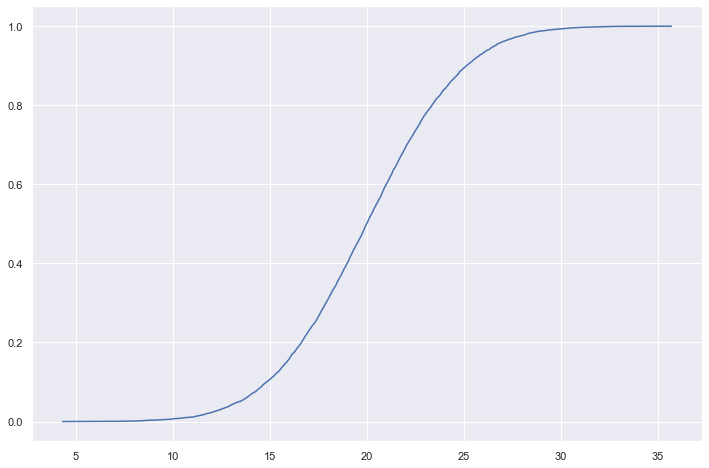

In [10]:
# j/a ecdf plot (for normal sample data)
ecdf = ECDF(dataframe['normal'])
plt.plot(ecdf.x, ecdf.y)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [11]:
def q1():
    # get the quantiles (25, 50 and 75)
    q1_norm = np.percentile(dataframe['normal'],25)
    q1_binom = np.percentile(dataframe['binomial'],25)
    q2_norm = np.percentile(dataframe['normal'],50)
    q2_binom = np.percentile(dataframe['binomial'],50)
    q3_norm = np.percentile(dataframe['normal'],75)
    q3_binom = np.percentile(dataframe['binomial'],75)
    # generate the tuple (q1_norm - q1_binom, q2_norm - q2_binom, q3_norm - q3_binom)
    # and round the answer to three decimal places
    return ((q1_norm - q1_binom).round(3), (q2_norm - q2_binom).round(3), (q3_norm - q3_binom).round(3))

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [42]:
def q2():
    # get the sample mean and standard deviation
    normal_mean = dataframe['normal'].mean()
    normal_std = dataframe['normal'].std()
    # fit an empirical distribution function
    ecdf = ECDF(dataframe['normal'])
    # get the probability that variable 'x' will take a value into 
    # the interval [normal_mean - normal_std, normal_mean + normal_std] 
    answer_q2 = round(ecdf(normal_mean + normal_std) - ecdf(normal_mean - normal_std),3)
    return np.float(answer_q2)


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [13]:
# get the sample mean and standard deviation
normal_mean = dataframe['normal'].mean()
normal_std = dataframe['normal'].std()
# fit an empirical distribution function
ecdf = ECDF(dataframe['normal'])

In [14]:
# get the probability that variable 'x' will take a value into 
# the interval [normal_mean - 2*normal_std, normal_mean + 2*normal_std] 
ecdf(normal_mean + 2*normal_std) - ecdf(normal_mean - 2*normal_std)

0.9538

In [15]:
# get the probability that variable 'x' will take a value into 
# the interval [normal_mean - 3*normal_std, normal_mean + 3*normal_std] 
ecdf(normal_mean + 3*normal_std) - ecdf(normal_mean - 3*normal_std)

0.9973000000000001

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [16]:
def q3():
    # get the sample mean and variance (f/ normal and binomial)
    m_norm = dataframe['normal'].mean()
    v_norm = dataframe['normal'].var()
    m_binom = dataframe['binomial'].mean()
    v_binom = dataframe['binomial'].var()
    # get the difference between means and variances
    # a/ round the answer to three decimal places
    return ((m_binom - m_norm).round(3), (v_binom - v_norm).round(3))

Para refletir:

* Você esperava valores dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [17]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [18]:
# j/a preview
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,False
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False


In [19]:
# get the datatypes
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_profile    17898 non-null float64
sd_profile      17898 non-null float64
kurt_profile    17898 non-null float64
skew_profile    17898 non-null float64
mean_curve      17898 non-null float64
sd_curve        17898 non-null float64
kurt_curve      17898 non-null float64
skew_curve      17898 non-null float64
target          17898 non-null bool
dtypes: bool(1), float64(8)
memory usage: 1.1 MB


In [20]:
# get the sum of missing values
stars.isna().sum()

mean_profile    0
sd_profile      0
kurt_profile    0
skew_profile    0
mean_curve      0
sd_curve        0
kurt_curve      0
skew_curve      0
target          0
dtype: int64

In [21]:
# get the #columns and #rows
stars.shape

(17898, 9)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [22]:
def q4():
    # define the filter
    is_not_a_pulser = stars['target'] == 0
    # get the 'mean_profile' w/ only not pulsar stars
    false_pulsar_mp = stars[is_not_a_pulser]['mean_profile']
    # standardize 'false_pulsar_mp'
    false_pulsar_mean_profile_standardized = (false_pulsar_mp-false_pulsar_mp.mean())/false_pulsar_mp.std()
    # get some theoretical quantiles (normal distribution)
    q80 = sct.norm.ppf(0.8, 0, 1)
    q90 = sct.norm.ppf(0.9, 0, 1)
    q95 = sct.norm.ppf(0.95, 0, 1)
    # fit an empirical distribution function
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    # get the probabilities associated with q80, q90 and q95
    # and round the answer to three decimal places
    p_q80 = ecdf(q80).round(3)
    p_q90 = ecdf(q90).round(3)
    p_q95 = ecdf(q95).round(3)
    return (p_q80, p_q90, p_q95)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [23]:
def q5():
    # define the filter
    is_not_a_pulser = stars['target'] == 0
    # get the 'mean_profile' w/ only not pulsar stars
    false_pulsar_mp = stars[is_not_a_pulser]['mean_profile']
    # standardize 'false_pulsar_mp'
    false_pulsar_mean_profile_standardized = (false_pulsar_mp-false_pulsar_mp.mean())/false_pulsar_mp.std()
    # get the q1, q2 and q3 (normal distribution)
    q1 = sct.norm.ppf(0.25, 0, 1)
    q2 = sct.norm.ppf(0.5, 0, 1)
    q3 = sct.norm.ppf(0.75, 0, 1)
    # get the q1, q2 and q3 (false_pulsar_mean_profile_standardized)
    emp_q1 = np.percentile(false_pulsar_mean_profile_standardized,25)
    emp_q2 = np.percentile(false_pulsar_mean_profile_standardized,50)
    emp_q3 = np.percentile(false_pulsar_mean_profile_standardized,75)
    # calculate the difference between emp_qi - qi
    return ((emp_q1-q1).round(3), (emp_q2-q2).round(3), (emp_q3-q3).round(3))

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.